In [3]:
!pip install yfinance

In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [55]:
start = '2010-01-01'
end = '2019-12-31'
df = yf.download('TSLA', start=start, end=end, progress=False)
print(df.head())

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


In [56]:
print(df.tail())

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-12-23  27.452000  28.134001  27.333332  27.948000  27.948000  199794000
2019-12-24  27.890667  28.364668  27.512667  28.350000  28.350000  120820500
2019-12-26  28.527332  28.898666  28.423332  28.729334  28.729334  159508500
2019-12-27  29.000000  29.020666  28.407333  28.691999  28.691999  149185500
2019-12-30  28.586000  28.600000  27.284000  27.646667  27.646667  188796000


In [57]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


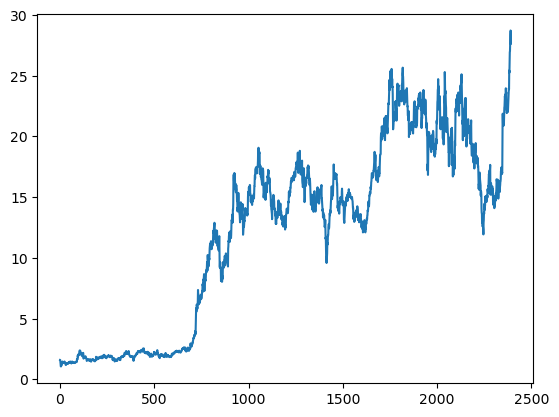

In [59]:
plt.plot(df.Close)

In [60]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2388    18.778527
2389    18.905800
2390    19.040880
2391    19.173967
2392    19.294820
Name: Close, Length: 2393, dtype: float64

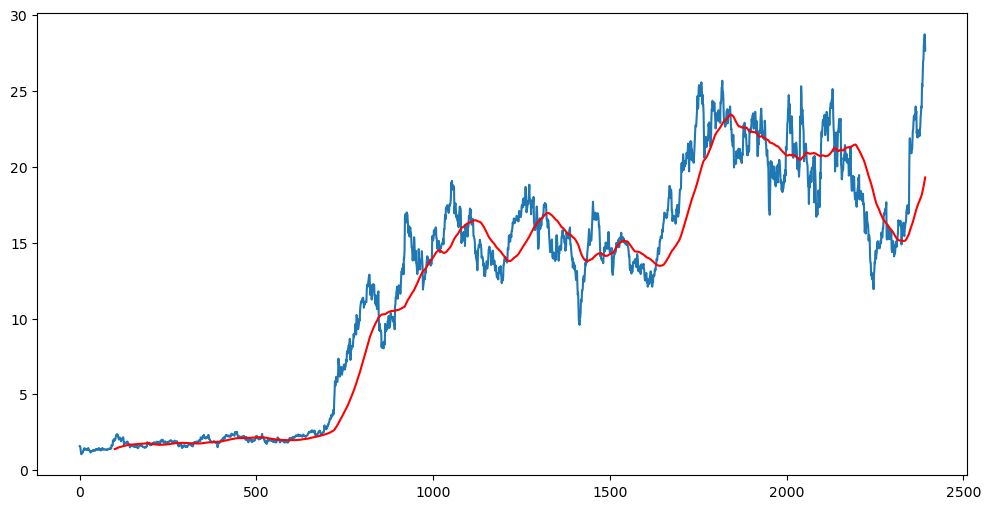

In [61]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'r')

In [62]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2388    17.430070
2389    17.477367
2390    17.524693
2391    17.571500
2392    17.617923
Name: Close, Length: 2393, dtype: float64

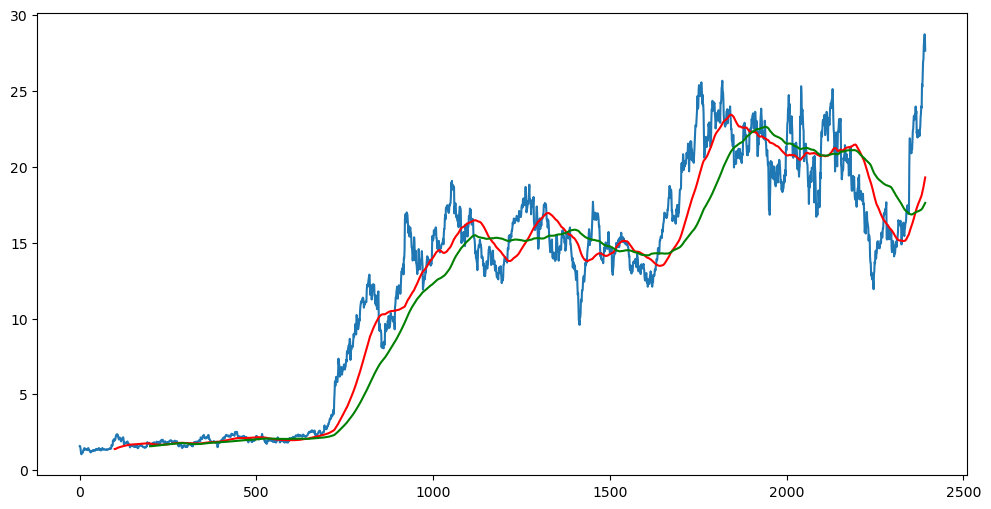

In [63]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'r')
plt.plot(ma200 , 'g')

In [64]:
df.shape

(2393, 7)

In [65]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
 
print(data_training.shape)
print(data_testing.shape)

(1675, 1)
(718, 1)


In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))

data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02993639],
       [0.02971437],
       [0.02279457],
       ...,
       [0.94889733],
       [0.96799146],
       [0.95363383]])

In [67]:
x_train = []
y_train = []

for i in range (100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train , y_train = np.array(x_train) , np.array(y_train)

x_train.shape

(1575, 100, 1)

In [68]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [69]:
model=Sequential()
model.add(LSTM(units=50 , activation = 'relu' , return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60 , activation = 'relu' , return_sequences=True,))
model.add(Dropout(0.3))

model.add(LSTM(units=80 , activation = 'relu' , return_sequences=True,))
model.add(Dropout(0.4))

model.add(LSTM(units=120 , activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [ ]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
model.fit(x_train , y_train , epochs = 50)

Epoch 1/50
50/50 [==============================] - 40s 477ms/step - loss: 0.0838
Epoch 2/50
50/50 [==============================] - 25s 498ms/step - loss: 0.0163
Epoch 3/50
50/50 [==============================] - 20s 402ms/step - loss: 0.0119
Epoch 4/50
50/50 [==============================] - 19s 385ms/step - loss: 0.0131
Epoch 5/50
50/50 [==============================] - 20s 402ms/step - loss: 0.0113
Epoch 6/50
50/50 [==============================] - 22s 437ms/step - loss: 0.0107
Epoch 7/50
50/50 [==============================] - 24s 490ms/step - loss: 0.0095
Epoch 8/50
50/50 [==============================] - 23s 454ms/step - loss: 0.0110
Epoch 9/50
50/50 [==============================] - 22s 438ms/step - loss: 0.0105
Epoch 10/50
50/50 [==============================] - 23s 463ms/step - loss: 0.0091
Epoch 11/50
50/50 [==============================] - 23s 461ms/step - loss: 0.0092
Epoch 12/50
50/50 [==============================] - 23s 455ms/step - loss: 0.0086
Epoch 13/50
5

In [28]:
model.save('my_models.keras')

In [29]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [38]:
data_training.tail(100)

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [39]:
past_100_days = data_training.tail(100)

In [41]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [42]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [43]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [44]:
input_data.shape

(855, 1)

In [46]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [47]:
x_test , y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [48]:
# Making Predictions

y_predicted = model.predict(x_test)

24/24 [==============================] - 4s 121ms/step


In [49]:
y_predicted.shape

(755, 1)

In [50]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [51]:
y_predicted

array([[0.16310893],
       [0.16461284],
       [0.16584925],
       [0.1667215 ],
       [0.16716896],
       [0.16718712],
       [0.16683772],
       [0.16623893],
       [0.16553158],
       [0.16485344],
       [0.16431722],
       [0.16399065],
       [0.16391885],
       [0.16412379],
       [0.16459951],
       [0.16531202],
       [0.16621062],
       [0.16723049],
       [0.16831967],
       [0.16944723],
       [0.17055973],
       [0.17162582],
       [0.17260441],
       [0.17357022],
       [0.17467272],
       [0.176053  ],
       [0.17781845],
       [0.18005799],
       [0.182825  ],
       [0.18612775],
       [0.18991631],
       [0.19402483],
       [0.19835643],
       [0.20285359],
       [0.20739424],
       [0.21187042],
       [0.21613587],
       [0.22013307],
       [0.22381487],
       [0.22714297],
       [0.2300967 ],
       [0.23267184],
       [0.23490742],
       [0.2368463 ],
       [0.23853181],
       [0.24001376],
       [0.2413322 ],
       [0.242

In [52]:
scaler.scale_

array([0.02123255])

In [53]:
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

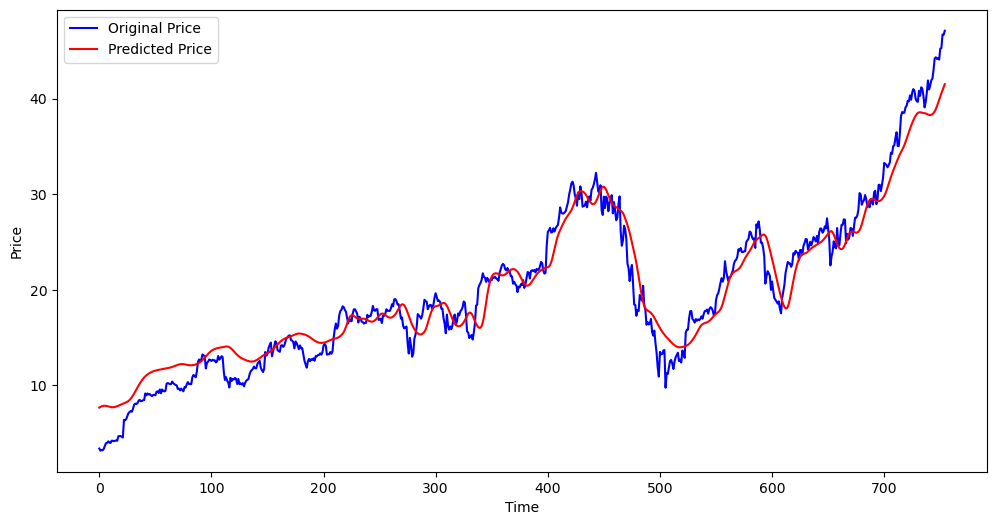

In [54]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()